In [231]:
import pandas as pd

data = pd.read_csv("./hightechexportsDATA/hightechexports.csv", skiprows=4)

display(data.head(2))


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,High-technology exports (current US$),TX.VAL.TECH.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.265878e+06,1.255852e+06,2.004844e+06,2.562889e+06,1.655574e+06,1.788242e+06,1.171447e+06,1.735161e+06,NaN,NaN
1,Africa Eastern and Southern,AFE,High-technology exports (current US$),TX.VAL.TECH.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.235789e+09,2.960244e+09,2.593774e+09,2.615579e+09,2.216235e+09,2.135146e+09,2.652601e+09,2.753289e+09,NaN,NaN


#### Dropping columns

In [232]:
# Checking total row & total columns
data_dim = (data.shape[0], data.shape[1])
print("data dimensions:", data_dim, "\n")

# Looking at missing values
print(display(data.isna().sum()), "\n")

print("Columns before dropping completely null columns:")
print(data.columns, "\n")

# Drop columns with all NaN values
data_cleaned = data.dropna(axis=1, how='all')

print("Columns remaining after dropping completely null columns:")
print(data_cleaned.columns, "\n")


data dimensions: (266, 69) 



Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              266
                 ... 
2020               76
2021               77
2022              110
2023              266
Unnamed: 68       266
Length: 69, dtype: int64

None 

Columns before dropping completely null columns:
Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'Unnamed: 68'],
      dtype='object') 

Columns remaining after dropping completely null columns:
Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2

#### Transmuting DF from wide to long format

In [233]:
# Reshape data using pd.melt() to get 'Year' and 'Value' columns
data_long = pd.melt(data_cleaned, 
                    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                    var_name='Year', 
                    value_name='Value')

# Convert 'Year' column to datetime format
data_long['Year'] = pd.to_datetime(data_long['Year'], format='%Y')

# Display the reshaped data
display(data_long.head())

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Aruba,ABW,High-technology exports (current US$),TX.VAL.TECH.CD,2007-01-01,NaN
1,Africa Eastern and Southern,AFE,High-technology exports (current US$),TX.VAL.TECH.CD,2007-01-01,NaN
2,Afghanistan,AFG,High-technology exports (current US$),TX.VAL.TECH.CD,2007-01-01,NaN
3,Africa Western and Central,AFW,High-technology exports (current US$),TX.VAL.TECH.CD,2007-01-01,NaN
4,Angola,AGO,High-technology exports (current US$),TX.VAL.TECH.CD,2007-01-01,NaN


#### Handling NULL/Missing Values 

<Figure size 1200x600 with 0 Axes>

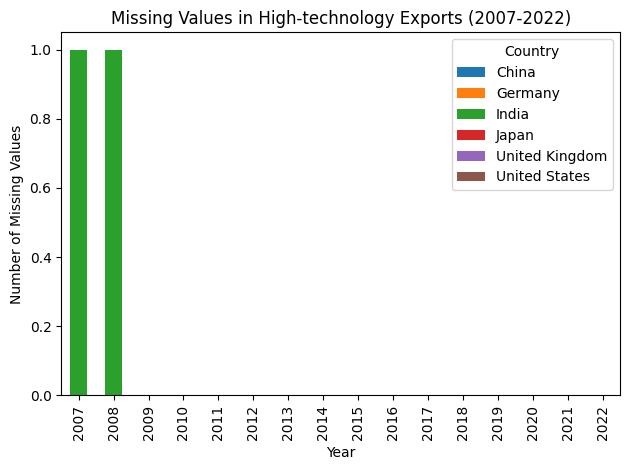

After Imputation, missing value counts are:
 Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
Year              0
Value             0
dtype: int64 



In [234]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Countries of interest
countries_of_interest = ['United States', 'United Kingdom', 'India', 'China', 'Germany', 'United Kingdom', 'Japan', 'South Korea']

# Filter the DataFrame for the specified countries and years
filtered_df = data_long[(data_long['Country Name'].isin(countries_of_interest)) & 
                  (data_long['Year'].between('2007-01-01', '2022-01-01'))]

# Format Year to show only the year and convert to int using .assign()
filtered_df = filtered_df.assign(Year=pd.to_datetime(filtered_df['Year']).dt.year)

# Count missing values for each country and year
missing_counts = filtered_df.groupby(['Country Name', 'Year'])['Value'].apply(lambda x: x.isnull().sum()).reset_index()

# Reshape the DataFrame for visualization
missing_counts_pivot = missing_counts.pivot(index='Year', columns='Country Name', values='Value').fillna(0)

# Create a visualization
plt.figure(figsize=(12, 6))
missing_counts_pivot.plot(kind='bar', stacked=True)
plt.title('Missing Values in High-technology Exports (2007-2022)')
plt.ylabel('Number of Missing Values')
plt.xlabel('Year')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.legend(title='Country')
plt.tight_layout()
plt.show()

# Imputing missing value using interpolation
filtered_df['Value'] = filtered_df['Value'].interpolate(method='linear')

# Looking at missing values count again
print("After Imputation, missing value counts are:\n",filtered_df.isna().sum(), "\n")


In [235]:
# Exception Handling [Global Financial Crisis (2007-2008)]
filtered_df = filtered_df[~filtered_df['Year'].isin([2007, 2008, 2009])]

# Filter for the United States
us_data = filtered_df[filtered_df['Country Name'] == 'United States'][['Year', 'Value']]
china_data = filtered_df[filtered_df['Country Name'] == 'China'][['Year', 'Value']]
japan_data = filtered_df[filtered_df['Country Name'] == 'Japan'][['Year', 'Value']]
germany_data = filtered_df[filtered_df['Country Name'] == 'Germany'][['Year', 'Value']]
uk_data = filtered_df[filtered_df['Country Name'] == 'United Kingdom'][['Year', 'Value']]
india_data = filtered_df[filtered_df['Country Name'] == 'India'][['Year', 'Value']]


# set year as an index of df
us_data.set_index('Year', inplace=True)
us_data['Value'] = us_data['Value'].astype(float)
china_data.set_index('Year', inplace=True)
china_data['Value'] = china_data['Value'].astype(float)
japan_data.set_index('Year', inplace=True)
japan_data['Value'] = japan_data['Value'].astype(float)
germany_data.set_index('Year', inplace=True)
germany_data['Value'] = germany_data['Value'].astype(float)
uk_data.set_index('Year', inplace=True)
uk_data['Value'] = uk_data['Value'].astype(float)
india_data.set_index('Year', inplace=True)
india_data['Value'] = india_data['Value'].astype(float)

# Log Normalization
import numpy as np
us_log = np.log(us_data['Value'])



#### Visualization of data

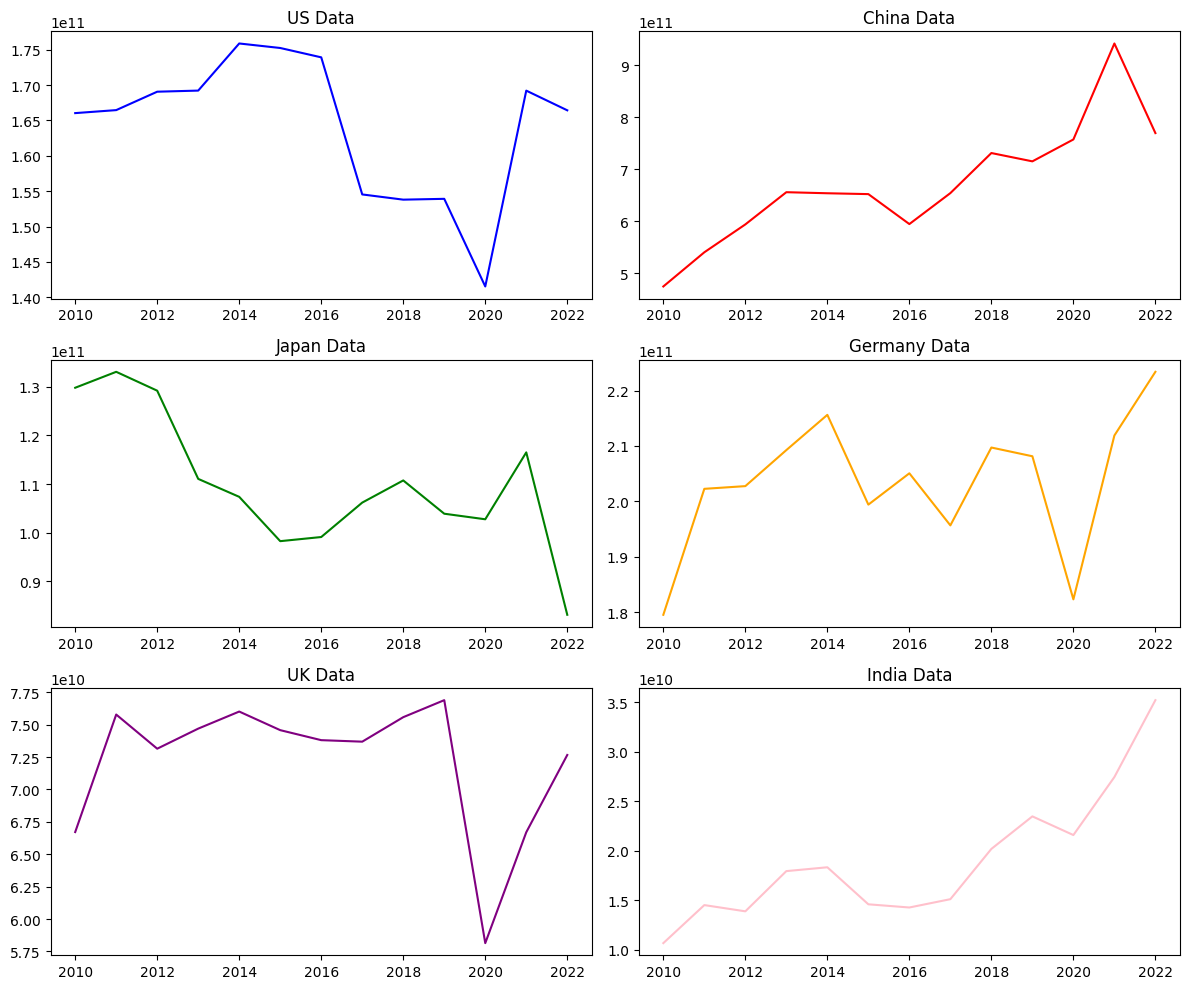

In [236]:
# us_data.plot()
# china_data.plot()
# japan_data.plot()
# germany_data.plot()
# uk_data.plot()

import matplotlib.pyplot as plt

# Sample data for demonstration (replace these with your actual data)
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

axs[0, 0].plot(us_data.index, us_data, label='US Data', color='blue')
axs[0, 0].set_title('US Data')
axs[0, 1].plot(china_data.index, china_data, label='China Data', color='red')
axs[0, 1].set_title('China Data')

axs[1, 0].plot(japan_data.index, japan_data, label='Japan Data', color='green')
axs[1, 0].set_title('Japan Data')
axs[1, 1].plot(germany_data.index, germany_data, label='Germany Data', color='orange')
axs[1, 1].set_title('Germany Data')

axs[2, 0].plot(uk_data.index, uk_data, label='UK Data', color='purple')
axs[2, 0].set_title('UK Data')
axs[2, 1].plot(india_data.index, india_data, label='India Data', color='pink')
axs[2, 1].set_title('India Data')

# Hide the empty subplot (if needed)
# axs[2, 1].axis('off')

# Show the plots
plt.tight_layout()
plt.show()


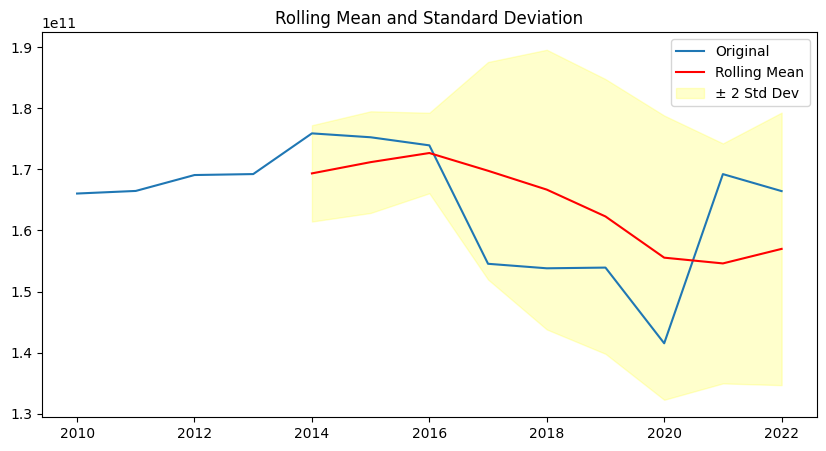

In [237]:
us_data['Rolling_Mean'] = us_data['Value'].rolling(window=5).mean()
us_data['Rolling_Std'] = us_data['Value'].rolling(window=5).std()

plt.figure(figsize=(10, 5))
plt.plot(us_data.index, us_data['Value'], label='Original')
plt.plot(us_data.index, us_data['Rolling_Mean'], color='red', label='Rolling Mean')
plt.fill_between(us_data.index, 
                 us_data['Rolling_Mean'] - 2 * us_data['Rolling_Std'], 
                 us_data['Rolling_Mean'] + 2 * us_data['Rolling_Std'], 
                 color='yellow', alpha=0.2, label='± 2 Std Dev')
plt.title('Rolling Mean and Standard Deviation')
plt.legend()
plt.show()


In [238]:
# Before applying ARIMA/SARIMA, it's crucial to check if the time series is stationary. 
# We can use the Augmented Dickey-Fuller (ADF) test for this.
from statsmodels.tsa.stattools import adfuller

# ADF Test
result = adfuller(us_data['Value'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])


# If the series is not stationary (p-value > 0.05), we might need to difference the 
# data to achieve stationarity.
us_data['Value_diff'] = us_data['Value'].diff().dropna()

# ADF Test on Differenced Data
result_diff = adfuller(us_data['Value_diff'].dropna())
print('ADF Statistic:', result_diff[0])
print('p-value:', result_diff[1])



ADF Statistic: -2.8094960914523024
p-value: 0.05693006981067406
ADF Statistic: -1.4369937583777908
p-value: 0.5644180466215214


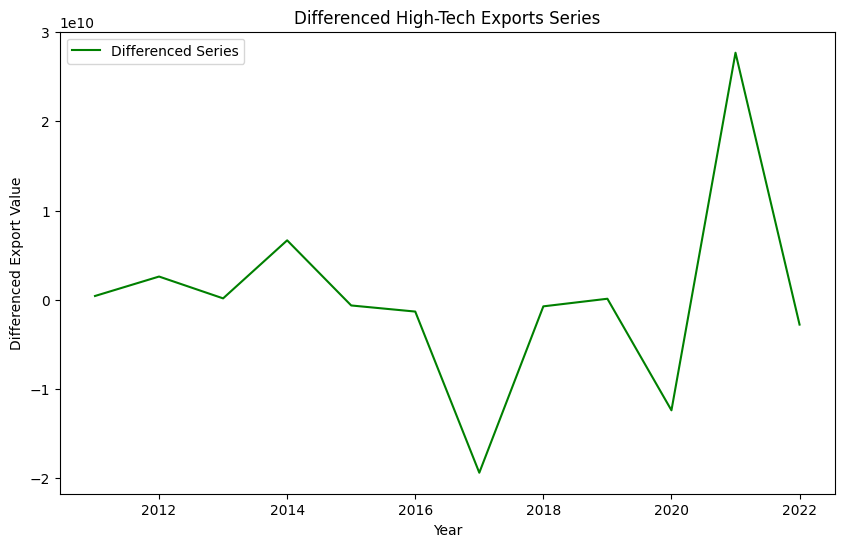

In [239]:
df_diff = us_data['Value_diff'].dropna()

plt.figure(figsize=(10, 6))
plt.plot(df_diff, color='g', label='Differenced Series')
plt.title('Differenced High-Tech Exports Series')
plt.xlabel('Year')
plt.ylabel('Differenced Export Value')
plt.legend()
plt.show()


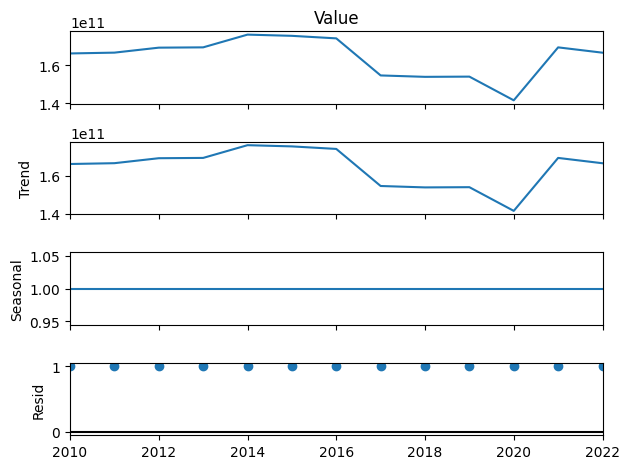

In [240]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(us_data['Value'], model='multiplicative', period=1)
decomposition.plot()
plt.show()


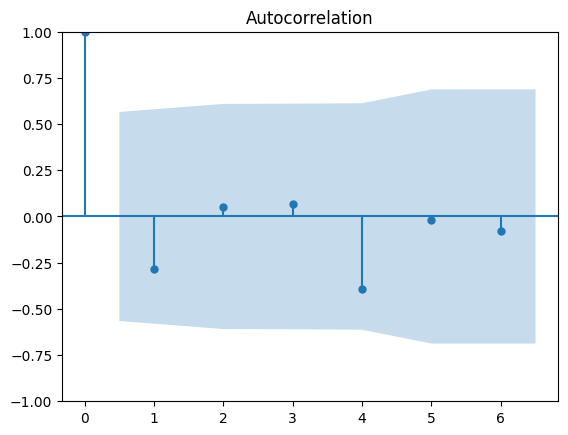

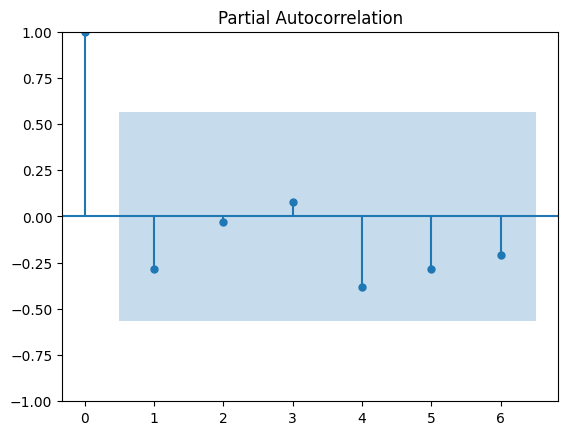

In [241]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF of the differenced data
plot_acf(df_diff)
plot_pacf(df_diff)
plt.show()


#### Model Selection
Using ACF and PACF plots, we can determine the appropriate parameters for ARIMA/SARIMA.

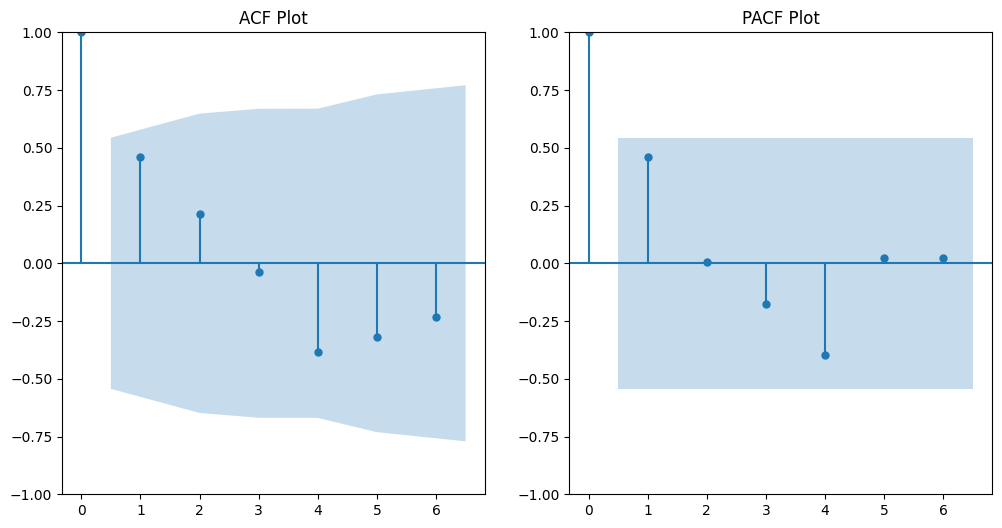

In [242]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Adjusted ACF and PACF plots with lags <= 10 (or < 16 as per available data points)
plt.figure(figsize=(12, 6))

# ACF Plot
plt.subplot(1, 2, 1)
plot_acf(us_data['Value'].dropna(), lags=6, ax=plt.gca())  # Set lags to 8
plt.title('ACF Plot')

# PACF Plot
plt.subplot(1, 2, 2)
plot_pacf(us_data['Value'].dropna(), lags=6, ax=plt.gca())
plt.title('PACF Plot')

plt.show()

In [243]:
from statsmodels.tsa.arima.model import ARIMA

# Initial ARIMA model
model = ARIMA(us_data['Value'], order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   13
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -294.240
Date:                Mon, 28 Oct 2024   AIC                            594.479
Time:                        01:43:51   BIC                            595.934
Sample:                             0   HQIC                           593.941
                                 - 13                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6897      2.578     -0.268      0.789      -5.742       4.363
ma.L1          0.6742      2.688      0.251      0.802      -4.594       5.942
sigma2      1.493e+20   1.76e-20   8.49e+39      0.0

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [244]:
from statsmodels.tsa.arima.model import ARIMA

# Initial ARIMA model
model = ARIMA(us_data['Value_diff'], order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Value_diff   No. Observations:                   13
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -296.366
Date:                Mon, 28 Oct 2024   AIC                            598.733
Time:                        01:43:51   BIC                            600.187
Sample:                             0   HQIC                           598.194
                                 - 13                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3978      0.993     -0.401      0.689      -2.343       1.548
ma.L1         -0.5033      1.446     -0.348      0.728      -3.337       2.330
sigma2      2.425e+20        nan        nan        n

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [245]:
forecast = model_fit.forecast(steps=10)  # Change 10 to however many steps you want to forecast
forecast

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


13    8.742390e+09
14    4.158284e+09
15    5.981774e+09
16    5.256416e+09
17    5.544953e+09
18    5.430177e+09
19    5.475833e+09
20    5.457672e+09
21    5.464896e+09
22    5.462022e+09
Name: predicted_mean, dtype: float64

<Axes: >

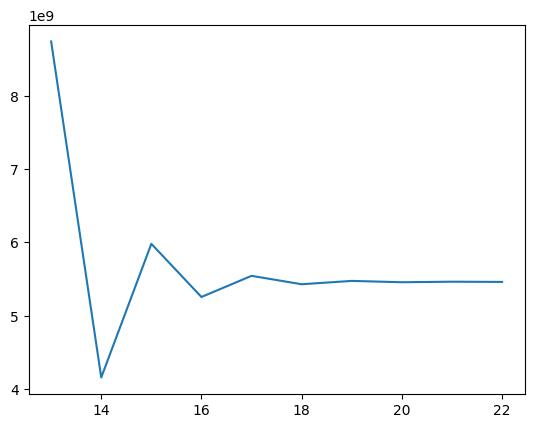

In [246]:
forecast.plot()